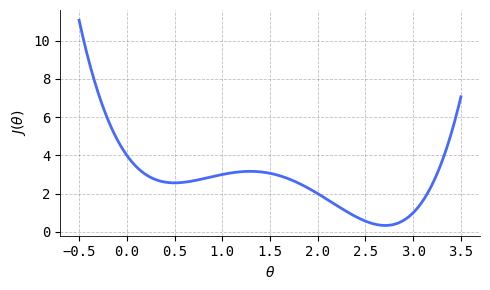

In [236]:
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from gd_utils import GD, SGD
#import matplotlib_inline.backend_inline
plt.style.use('./aux-files/custom_style_light.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
blue = '#486AFB'
magenta = '#FD46FC'

def J(theta):
    return (theta ** 4) - 6 * (theta ** 3) + 11 * (theta ** 2) - 7 * theta + 4

grid = torch.linspace(start=-0.5, end=3.5, steps=300)
plt.plot(grid, J(grid))
plt.xlabel('$\\theta$')
plt.ylabel('$J(\\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

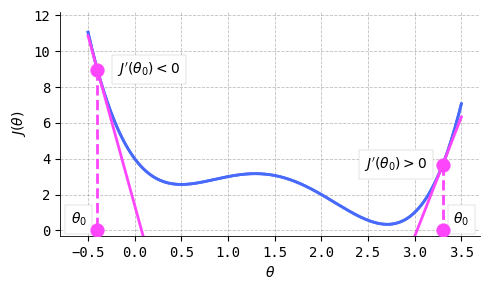

In [237]:
def J_prime(theta):
    return 4 * (theta ** 3) - 18 * (theta ** 2) + 22 * theta - 7

plt.plot(grid, J(grid), color=blue)
plt.plot(grid, J_prime(-0.4) * (grid + 0.4) + J(-0.4), color=magenta, zorder=10)
plt.scatter(-0.4, J(-0.4), color=magenta, s=100, zorder=15)
plt.scatter(-0.4, 0, color=magenta, s=100, zorder=20)
plt.plot([-0.4, -0.4], [J(-0.4), 0], color=magenta, linestyle='--')
plt.xlim(-0.8, 3.7)
plt.ylim(-0.3, 12.2)
plt.text(-0.6, 0.6, r'$\theta_0$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(0.15, J(-0.4), r"$J'(\theta_0)<0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))

plt.plot(grid, J(grid))
plt.plot(grid, J_prime(3.3) * (grid - 3.3) + J(3.3))
plt.scatter(3.3, J(3.3), color=magenta, s=100, zorder=10)
plt.scatter(3.3, 0, color=magenta, s=100, zorder=10)
plt.plot([3.3, 3.3], [J(3.3), 0], color=magenta, linestyle='--')
plt.text(3.5, 0.6, '$\\theta_0$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(2.8, J(3.3), "$J'(\\theta_0)>0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))

plt.xlabel('$\\theta$')
plt.ylabel('$J(\\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

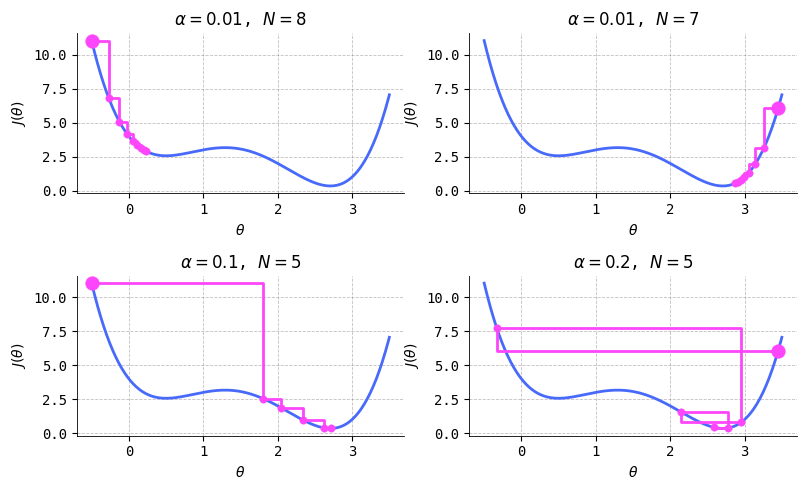

In [238]:
# parameters for gradient descent
gd_parameters = {'theta': [torch.tensor([-0.5], requires_grad=True),
                           torch.tensor([3.45], requires_grad=True),
                           torch.tensor([-0.5], requires_grad=True),
                           torch.tensor([3.45], requires_grad=True)],
                 'num_steps': [8, 7, 5, 5],
                 'lr': [1e-2, 1e-2, 1e-1, 2e-1]}

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
grid = torch.linspace(start=-0.5, end=3.5, steps=300)

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(**gd_parameters_slice, J=J)
    
    lr = gd_parameters_slice['lr']
    num_steps = gd_parameters_slice['num_steps']
    
    axis.plot(grid, J(grid))
    axis.step(x=gd_output.thetas, y=gd_output.objectives, where='post', color=magenta, zorder=2)
    axis.scatter(x=gd_output.thetas, y=gd_output.objectives, s=30, color=magenta, zorder=2)
    axis.scatter(x=gd_output.thetas[0], y=gd_output.objectives[0], s=100, color=magenta, zorder=2)
    axis.set_xlabel('$\\theta$')
    axis.set_ylabel('$J(\\theta)$')
    axis.set_title(f'$\\alpha={lr}$, $N={num_steps}$')
plt.tight_layout()

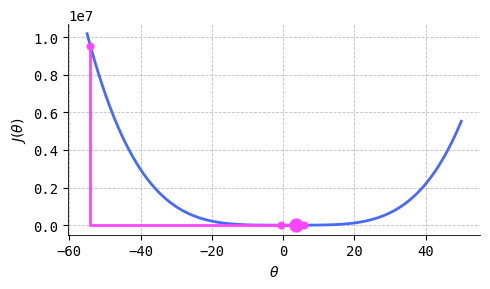

In [239]:
gd_parameters = {'theta': torch.tensor([3.5], requires_grad=True),
                 'num_steps': 3,
                 'lr': 2e-1,}

gd_output = GD(**gd_parameters, J=J)

grid = torch.linspace(start=-55, end=50, steps=300)
plt.plot(grid, J(grid))
plt.step(x=gd_output.thetas, y=gd_output.objectives, where='post', color=magenta, zorder=2)
plt.scatter(x=gd_output.thetas, y=gd_output.objectives, s=30, color=magenta, zorder=2)
plt.scatter(x=gd_output.thetas[0], y=gd_output.objectives[0], s=100, color=magenta, zorder=2)

plt.xlabel('$\\theta$')
plt.ylabel('$J(\\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

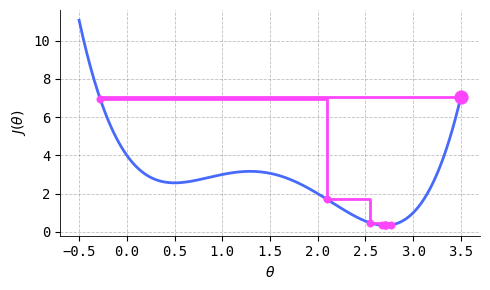

In [240]:
gd_parameters = {'theta': torch.tensor([3.5], requires_grad=True),
                 'num_steps': 8,
                 'lr': 2e-1,}

gd_output = GD(**gd_parameters, J=J, decay_rate=0.1)

grid = torch.linspace(start=-0.5, end=3.5, steps=300)
plt.plot(grid, J(grid))
plt.step(x=gd_output.thetas, y=gd_output.objectives, where='post', color=magenta, zorder=2)
plt.scatter(x=gd_output.thetas, y=gd_output.objectives, s=30, color=magenta, zorder=2)
plt.scatter(x=gd_output.thetas[0], y=gd_output.objectives[0], s=100, color=magenta, zorder=2)

plt.xlabel('$\\theta$')
plt.ylabel('$J(\\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

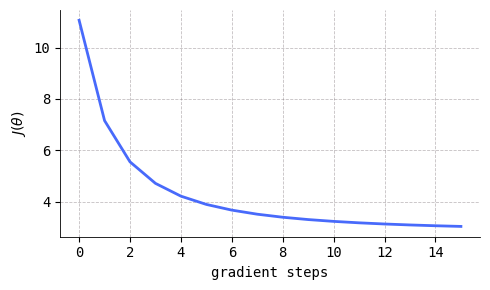

In [241]:
gd_parameters = {'theta': torch.tensor([-0.5], requires_grad=True),
                 'num_steps': 15,
                 'lr': 1e-2}

gd_output = GD(**gd_parameters, J=J, decay_rate=0.1)

plt.plot(range(len(gd_output.objectives)), gd_output.objectives)
plt.xlabel('gradient steps')
plt.ylabel('$J(\\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

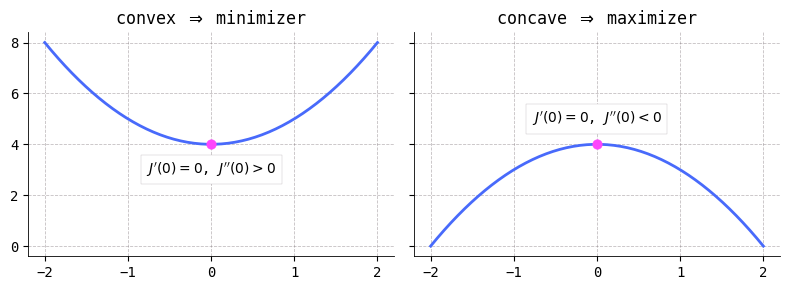

In [242]:
def f(x):
    return x ** 2 + 4

def g(x):
    return -x ** 2 + 4

functions = [f, g]
grid = np.linspace(-2, 2)
_, axes = plt.subplots(ncols=2, figsize=(8, 3), sharey=True, sharex=True)

for i, (function, axis) in enumerate(zip(functions, axes)):
    axis.plot(grid, function(grid))
    axis.scatter(0, 4, s=50, color=magenta, zorder=3)
    if i == 0:
        axis.text(0, 3, "$J '(0) = 0$, $J ''(0)>0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
        axis.set_title('convex $\Rightarrow$ minimizer')
    else:
        axis.text(0, 5, "$J '(0) = 0$, $J ''(0)<0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
        axis.set_title('concave $\Rightarrow$ maximizer')

plt.tight_layout()

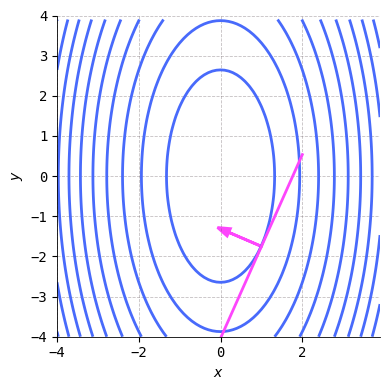

In [243]:
def f(x, y):
    return -4 * x ** 2 - y ** 2 + 15

grid = np.linspace(0, 2)
x, y = np.mgrid[-4:4:0.1, -4:4:0.1]
z = f(x, y)

def tangent_line(x):
    return (8 / 3.5) * (x - 1) - 1.75

plt.contour(x, y, z, levels=10, colors=blue, linestyles='solid')
plt.plot(grid, tangent_line(grid), color=magenta)
plt.arrow(1, -1.75, -8 / 10, 3.5 / 10, head_width=0.2, head_length=0.3, fc=magenta, ec=magenta, linewidth=2)
plt.gcf().set_size_inches(4, 4)
plt.ylim(-4, 4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()

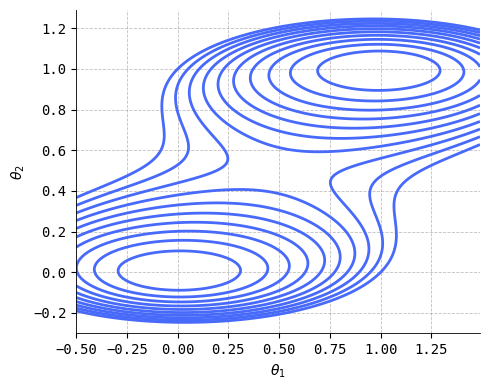

In [244]:
def J(theta):
    theta1 = theta[0]
    theta2 = theta[1]
    return (theta1 ** 2 + 10 * theta2 ** 2) * ((theta1 - 1) ** 2 + 10 * (theta2 - 1) ** 2)

x, y = np.mgrid[-0.50:1.5:0.01, -0.3:1.3:0.01]
grid = np.dstack((x, y))
z = np.apply_along_axis(J, axis=-1, arr=grid)

plt.contour(x, y, z, levels=range(11), colors=blue)
plt.xlabel('$\\theta_1$')
plt.ylabel('$\\theta_2$')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()

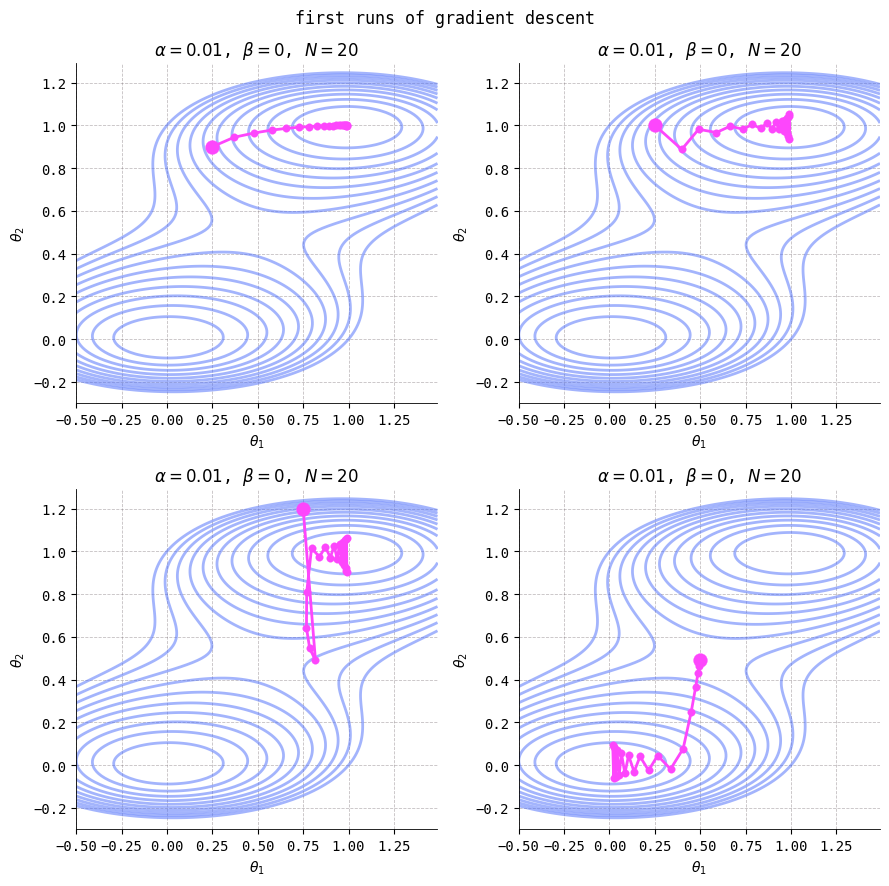

In [245]:
# parameters for gradient descent
gd_parameters = {'theta': [torch.tensor([0.25, 0.9], requires_grad=True),
                           torch.tensor([0.25, 1], requires_grad=True),
                           torch.tensor([0.75, 1.2], requires_grad=True),
                           torch.tensor([0.5, 0.49], requires_grad=True)],
                 'num_steps': [20, 20, 20, 20],
                 'lr': [1e-2, 1e-2, 1e-2, 1e-2]}

# run gradient descent and plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(**gd_parameters_slice, J=J)
    
    lr = gd_parameters_slice['lr']
    num_steps = gd_parameters_slice['num_steps']
    
    axis.contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)
    axis.plot(gd_output.thetas[:, 0], gd_output.thetas[:, 1], color=magenta)
    axis.scatter(gd_output.thetas[:, 0], gd_output.thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(x=gd_output.thetas[0, 0], y=gd_output.thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
    axis.set_title(f'$\\alpha={lr}$, $\\beta=0$, $N={num_steps}$')
    fig.suptitle('first runs of gradient descent')
plt.tight_layout()

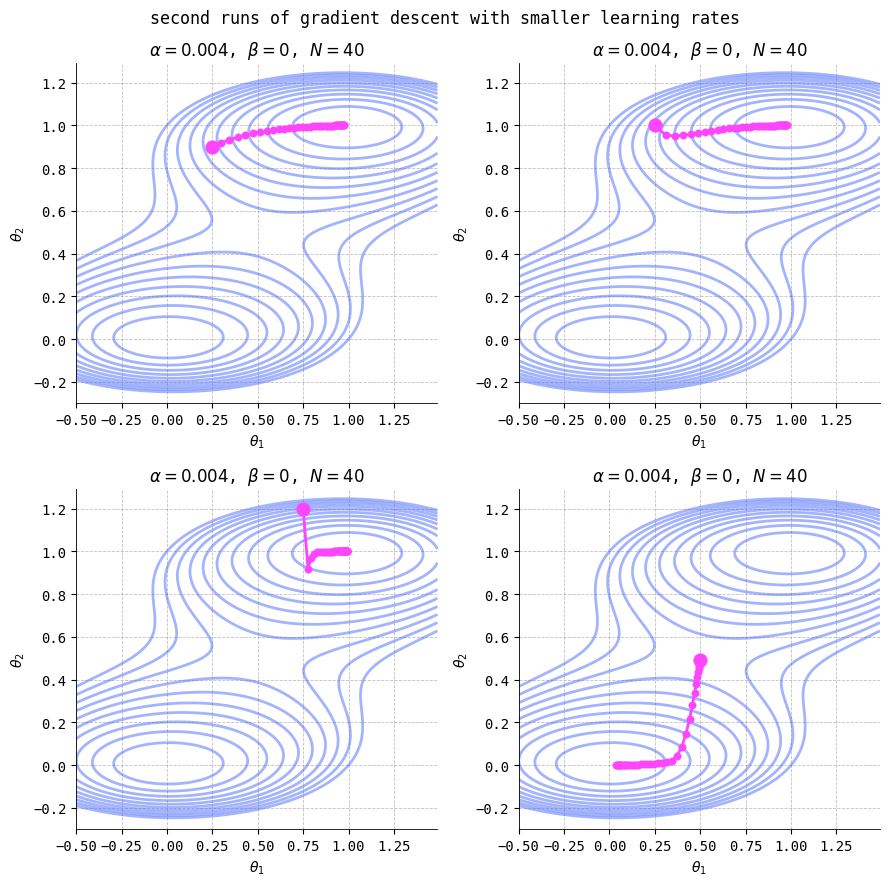

In [246]:
# parameters for gradient descent
gd_parameters = {'theta': [torch.tensor([0.25, 0.9], requires_grad=True),
                           torch.tensor([0.25, 1], requires_grad=True),
                           torch.tensor([0.75, 1.2], requires_grad=True),
                           torch.tensor([0.5, 0.49], requires_grad=True)],
                 'num_steps': [40, 40, 40, 40],
                 'lr': [4e-3, 4e-3, 4e-3, 4e-3]}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

# run gradient descent and plot
for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(**gd_parameters_slice, J=J)

    lr = gd_parameters_slice['lr']
    num_steps = gd_parameters_slice['num_steps']
    
    axis.contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)
    axis.plot(gd_output.thetas[:, 0], gd_output.thetas[:, 1], color=magenta)
    axis.scatter(gd_output.thetas[:, 0], gd_output.thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(x=gd_output.thetas[0, 0], y=gd_output.thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
    axis.set_title(f'$\\alpha={lr}$, $\\beta=0$, $N={num_steps}$')
    fig.suptitle('second runs of gradient descent with smaller learning rates')
plt.tight_layout()

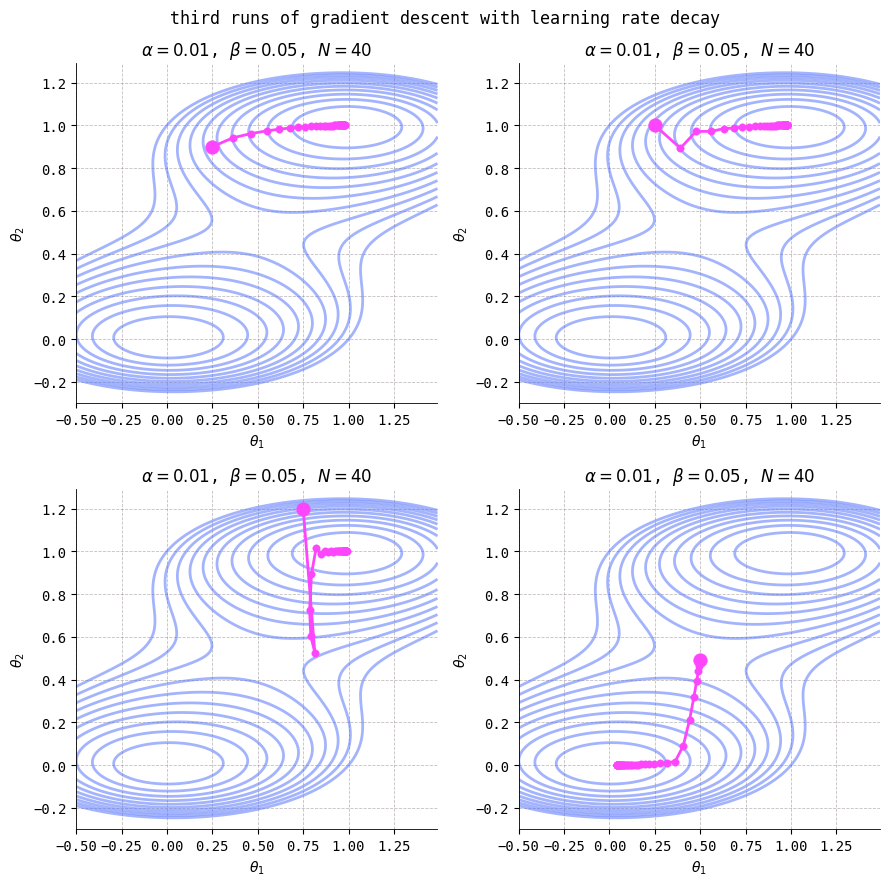

In [247]:
# parameters for gradient descent
gd_parameters = {'theta': [torch.tensor([0.25, 0.9], requires_grad=True),
                           torch.tensor([0.25, 1], requires_grad=True),
                           torch.tensor([0.75, 1.2], requires_grad=True),
                           torch.tensor([0.5, 0.49], requires_grad=True)],
                 'num_steps': [40, 40, 40, 40],
                 'lr': [1e-2, 1e-2, 1e-2, 1e-2]}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

# run gradient descent and plot
for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(**gd_parameters_slice, J=J, decay_rate=0.05)

    lr = gd_parameters_slice['lr']
    num_steps = gd_parameters_slice['num_steps']

    axis.contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)
    axis.plot(gd_output.thetas[:, 0], gd_output.thetas[:, 1], color=magenta)
    axis.scatter(gd_output.thetas[:, 0], gd_output.thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(x=gd_output.thetas[0, 0], y=gd_output.thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
    axis.set_title(f'$\\alpha={lr}$, $\\beta=0.05$, $N={num_steps}$')
    fig.suptitle('third runs of gradient descent with learning rate decay')
plt.tight_layout()

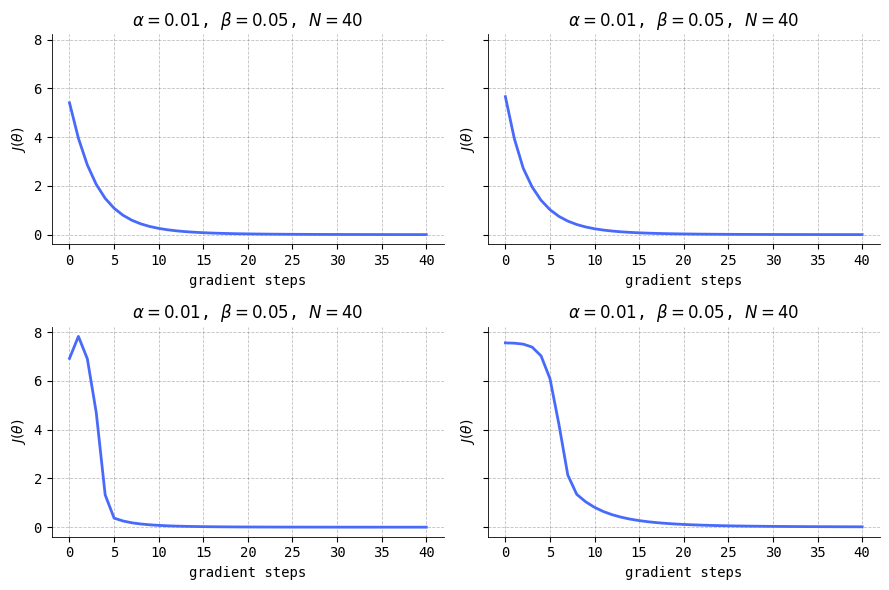

In [248]:
# parameters for gradient descent
gd_parameters = {'theta': [torch.tensor([0.25, 0.9], requires_grad=True),
                           torch.tensor([0.25, 1], requires_grad=True),
                           torch.tensor([0.75, 1.2], requires_grad=True),
                           torch.tensor([0.5, 0.49], requires_grad=True)],
                 'num_steps': [40, 40, 40, 40],
                 'lr': [1e-2, 1e-2, 1e-2, 1e-2]}

# run gradient descent and plot
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(**gd_parameters_slice, J=J, decay_rate=0.05)
    
    lr = gd_parameters_slice['lr']
    num_steps = gd_parameters_slice['num_steps']
    
    axis.plot(range(len(gd_output.objectives)), gd_output.objectives)
    
    axis.set_xlabel('gradient steps')
    axis.set_ylabel('$J(\\theta)$')
    axis.set_title(f'$\\alpha={lr}$, $\\beta=0.05$, $N={num_steps}$')
plt.tight_layout()

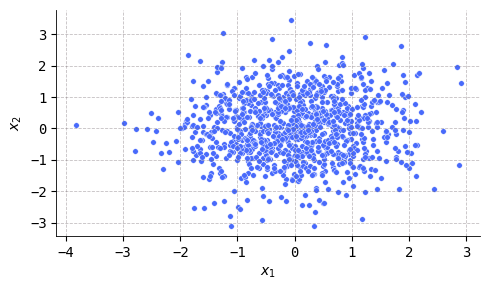

In [249]:
torch.manual_seed(42)
X = MultivariateNormal(loc=torch.zeros(2), covariance_matrix=torch.eye(2)).sample(sample_shape=(1024,))

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

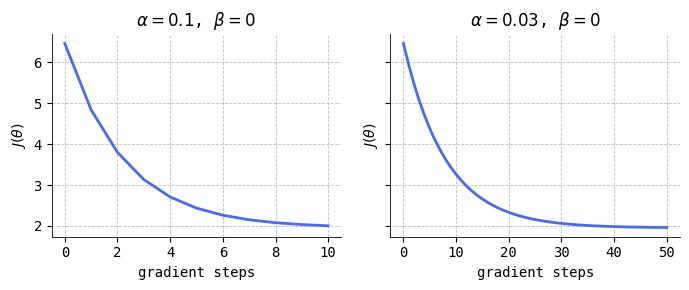

In [250]:
def g(X, theta):
    if isinstance(theta, np.ndarray):
        X = X.numpy()
        return np.linalg.norm(theta - X, axis=1) ** 2
    return torch.norm(theta - X, dim=1) ** 2

def J(theta):
    return g(X, theta).mean()

# batch gradient descent parameters
gd_parameters = {'num_steps': [10, 50],
                 'lr': [1e-1, 3e-2]}

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3), sharey=True)

for i, axis in enumerate(axes):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(**gd_parameters_slice, J=J, theta=torch.tensor([1.5, 1.5], requires_grad=True))
    
    lr = gd_parameters_slice['lr']
    
    axis.plot(range(len(gd_output.objectives)), gd_output.objectives)
    
    axis.set_xlabel('gradient steps')
    axis.set_ylabel('$J(\\theta)$')
    axis.set_title(f'$\\alpha={lr}$, $\\beta=0$')
plt.tight_layout()

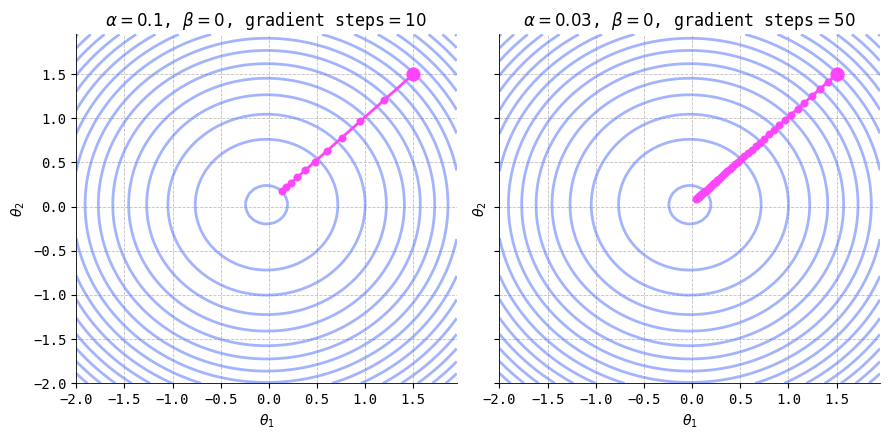

In [251]:
x, y = np.mgrid[-2:2:0.05, -2:2:0.05]
grid = np.dstack((x, y))
z = np.apply_along_axis(J, axis=-1, arr=grid)

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.5), sharey=True)

for i, axis in enumerate(axes):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(**gd_parameters_slice, J=J, theta=torch.tensor([1.5, 1.5], requires_grad=True))
    
    lr = gd_parameters_slice['lr']
    num_steps = gd_parameters_slice['num_steps']
    
    axis.contour(x, y, z, colors=blue, alpha=0.5, levels=np.arange(0, 10, 0.5))
    axis.plot(gd_output.thetas[:, 0], gd_output.thetas[:, 1], color=magenta)
    axis.scatter(gd_output.thetas[:, 0], gd_output.thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(gd_output.thetas[0, 0], gd_output.thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_title(f'$\\alpha={lr}$, $\\beta=0$, gradient steps$={num_steps}$')
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
plt.tight_layout()

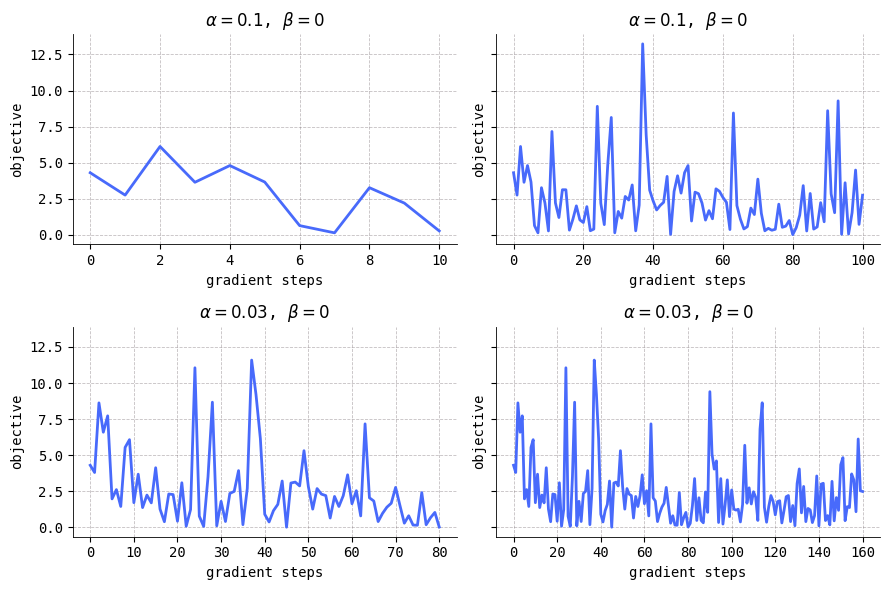

In [252]:
# SGD parameters
sgd_parameters = {'lr': [1e-1, 1e-1, 3e-2, 3e-2],
                  'max_steps': [10, 100, 80, 160]}

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i, axis in enumerate(axes.flatten()):
    sgd_parameters_slice = {key: value[i] for key, value in sgd_parameters.items()}
    sgd_output = SGD(**sgd_parameters_slice,
                    g=g,
                    X=X,
                    theta=torch.tensor([1.5, 1.5], requires_grad=True),
                    batch_size=1,
                    num_epochs=1,
                    random_state=42)
    
    lr = sgd_parameters_slice['lr']
    
    axis.plot(range(len(sgd_output.per_step_objectives)), sgd_output.per_step_objectives)
    axis.set_xlabel('gradient steps')
    axis.set_ylabel('objective')
    axis.set_title(f'$\\alpha={lr}$, $\\beta=0$')
plt.tight_layout()

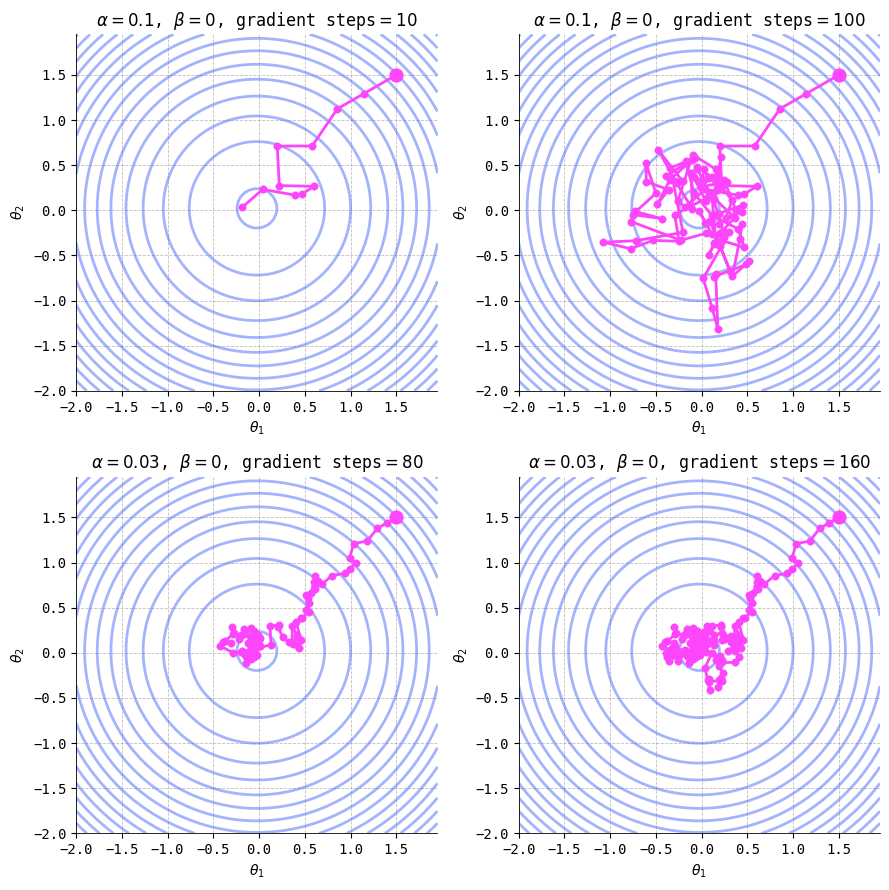

In [253]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for i, axis in enumerate(axes.flatten()):
    sgd_parameters_slice = {key: value[i] for key, value in sgd_parameters.items()}
    sgd_output = SGD(**sgd_parameters_slice,
                    g=g,
                    X=X,
                    theta=torch.tensor([1.5, 1.5], requires_grad=True),
                    batch_size=1,
                    num_epochs=1,
                    random_state=42)
    
    lr = sgd_parameters_slice['lr']
    max_steps = sgd_parameters_slice['max_steps']
    
    axis.contour(x, y, z, levels=np.arange(0, 10, 0.5), colors=blue, alpha=0.5)
    axis.plot(sgd_output.thetas[:, 0], sgd_output.thetas[:, 1], color=magenta)
    axis.scatter(sgd_output.thetas[:, 0], sgd_output.thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(sgd_output.thetas[0, 0], sgd_output.thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_title(f'$\\alpha={lr}$, $\\beta=0$, gradient steps$={max_steps}$')
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
plt.tight_layout()

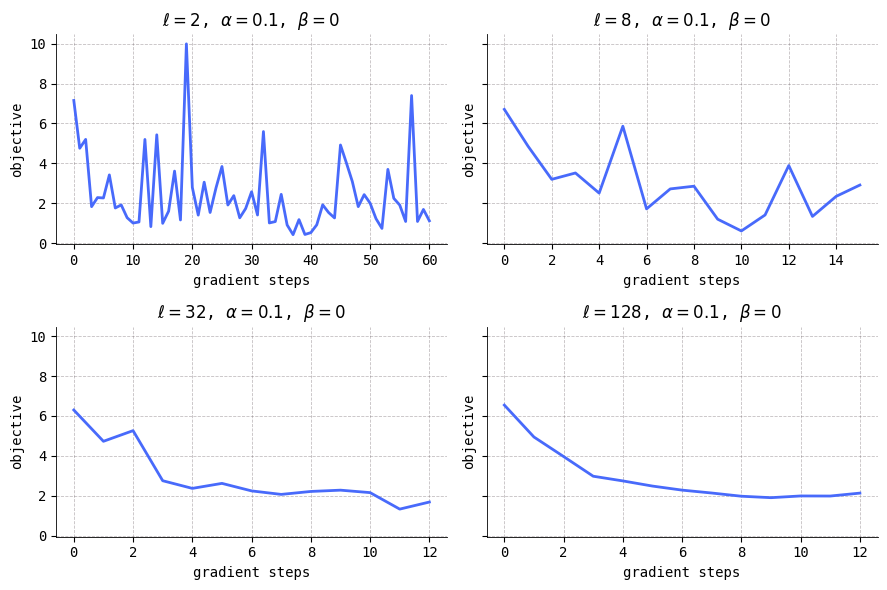

In [254]:
# mini-batch gradient descent parameters
sgd_parameters = {'num_epochs': [1, 1, 1, 2],
                 'lr': [1e-1, 1e-1, 1e-1, 1e-1],
                 'batch_size': [2, 8, 32, 128],
                 'max_steps': [60, 15, 12, 12]}

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i, axis in enumerate(axes.flatten()):
    sgd_parameters_slice = {key: value[i] for key, value in sgd_parameters.items()}
    sgd_output = SGD(**sgd_parameters_slice,
                    g=g,
                    X=X,
                    theta=torch.tensor([1.5, 1.5], requires_grad=True),
                    random_state=42)
    
    batch_size = sgd_parameters_slice['batch_size']
    lr = sgd_parameters_slice['lr']
    
    axis.plot(range(len(sgd_output.per_step_objectives)), sgd_output.per_step_objectives)
    axis.set_xlabel('gradient steps')
    axis.set_ylabel('objective')
    axis.set_title(f'$\\ell={batch_size}$, $\\alpha={lr}$, $\\beta=0$')
plt.tight_layout()

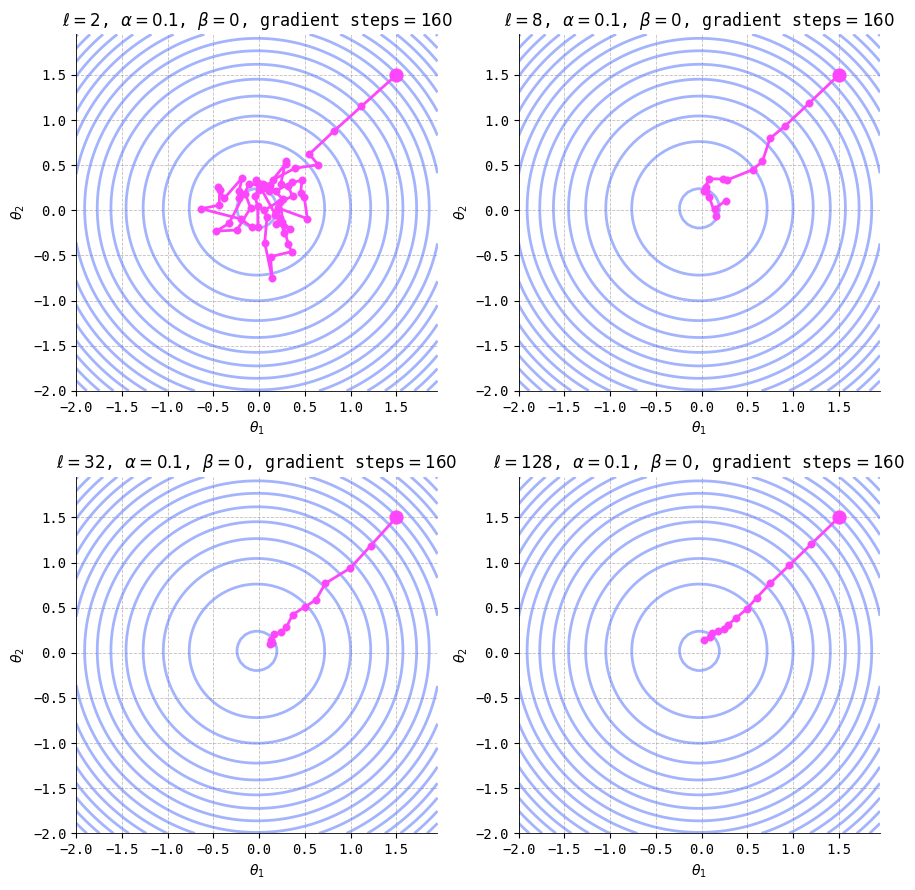

In [255]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for i, axis in enumerate(axes.flatten()):
    sgd_parameters_slice = {key: value[i] for key, value in sgd_parameters.items()}
    sgd_output = SGD(**sgd_parameters_slice,
                    g=g,
                    X=X,
                    theta=torch.tensor([1.5, 1.5], requires_grad=True),
                    random_state=42)
    
    lr = sgd_parameters_slice['lr']
    batch_size = sgd_parameters_slice['batch_size']
    
    axis.contour(x, y, z, levels=np.arange(0, 10, 0.5), colors=blue, alpha=0.5)
    axis.plot(sgd_output.thetas[:, 0], sgd_output.thetas[:, 1], color=magenta)
    axis.scatter(sgd_output.thetas[:, 0], sgd_output.thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(sgd_output.thetas[0, 0], sgd_output.thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_title(f'$\\ell={batch_size}$, $\\alpha={lr}$, $\\beta=0$, gradient steps$={max_steps}$')
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
plt.tight_layout()